<a href="https://colab.research.google.com/github/BouzCS/Sign-Language-Detection/blob/main/Sign_Language_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import itertools
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Dropout, Flatten

In [ ]:
import pandas as pd

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!zip -FF "drive/My Drive/ISL_CSLRT_Corpus.zip" -O 'fixed.zip'

Streaming output truncated to the last 5000 lines.
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 12.jpg  (7984 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 13.jpg  (7975 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 14.jpg  (7917 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/  (0 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/become 01.jpg  (103603 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/become 02.jpg  (104251 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/become 03.jpg  (104238 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/become 04.jpg  (105072 bytes)
 copying: ISL_CSLRT_Corpus/Frames_Sen

In [6]:
!unzip /content/fixed.zip

Streaming output truncated to the last 5000 lines.
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 09.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 10.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 11.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 12.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 13.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/2/what do you want to become (2) 14.jpg  
   creating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/
  inflating: ISL_CSLRT_Corpus/Frames_Sentence_Level/what do you want to become/3/become 01.jpg  
  inflating: ISL_CSLRT_Corpus/Frames_Sentenc

In [7]:
!pip install mediapipe

In [ ]:
!ls -la
!echo "Hello"
!bash /content/download_include_data.sh

total 19890276
drwxr-xr-x 1 root root       4096 Apr 14 14:42  .
drwxr-xr-x 1 root root       4096 Apr 14 13:26  ..
-rw-r--r-- 1 root root 8905822924 Jan 22  2021  5de8c65d-30ba-4362-941f-47d61d435aa0
-rw-r--r-- 1 root root 1303983457 Apr  7 03:37 'Adjectives_1of8.zip?download=1'
drwxr-xr-x 1 root root       4096 Apr  8 13:31  .config
-rw-r--r-- 1 root root       1499 Apr 14 14:42  download_include_data.sh
drwxr-xr-x 2 root root       4096 Apr 14 13:39  .ipynb_checkpoints
-rw-r--r-- 1 root root 8905822924 Jan 25  2021  ISL_CSLRT_Corpus
drwxr-xr-x 1 root root       4096 Apr  8 13:32  sample_data
drwxr-xr-x 8 root root       4096 Sep 14  2020  Seasons
-rw-r--r-- 1 root root 1251955665 Apr  7 03:37  Seasons_1of1.zip
Hello
--2022-04-14 14:43:07--  https://zenodo.org/record/4010759/files/Adjectives_1of8.zip
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 130398345

In [ ]:

#print('Handedness:', results.multi_handedness)
#print('Handedness:', results.multi_handedness.classification.label)

Handedness: [classification {
  index: 1
  score: 0.9918121695518494
  label: "Right"
}
, classification {
  index: 1
  score: 0.5981738567352295
  label: "Right"
}
]


AttributeError: ignored

Handedness: [classification {
  index: 1
  score: 0.9918121695518494
  label: "Right"
}
, classification {
  index: 1
  score: 0.5981738567352295
  label: "Right"
}
]
WRIST:
x: 0.5725837349891663
y: 0.3549286425113678
z: -6.98301860779793e-08

THUMB_CMC:
x: 0.5571257472038269
y: 0.33421236276626587
z: 0.00314574153162539

THUMB_MCP:
x: 0.549809992313385
y: 0.3103828430175781
z: 0.003122026100754738

THUMB_IP:
x: 0.5438372492790222
y: 0.2905558943748474
z: 0.0005073107895441353

THUMB_TIP:
x: 0.5398915410041809
y: 0.26895925402641296
z: -0.0019603120163083076

INDEX_FINGER_MCP:
x: 0.5664832592010498
y: 0.2803388833999634
z: 0.011901136487722397

INDEX_FINGER_PIP:
x: 0.5592455267906189
y: 0.25662195682525635
z: 0.006268959492444992

INDEX_FINGER_DIP:
x: 0.5511519312858582
y: 0.2581634223461151
z: -4.700825229519978e-06

INDEX_FINGER_TIP:
x: 0.5461798906326294
y: 0.2663866877555847
z: -0.003265243023633957

MIDDLE_FINGER_MCP:
x: 0.570848822593689
y: 0.2762601673603058
z: 0.006473762914538

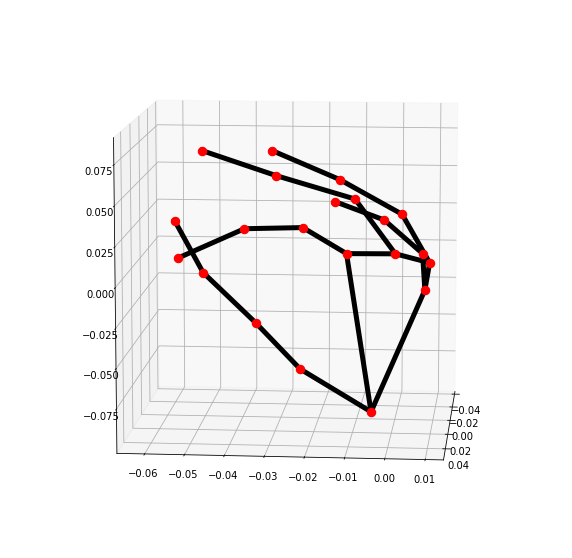

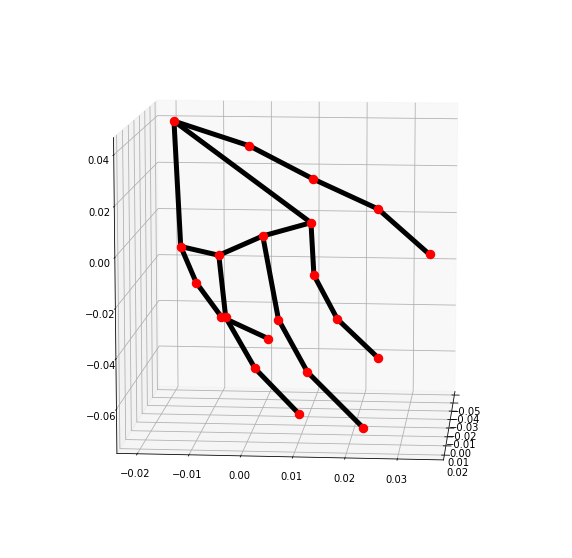

In [ ]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands
global_data = []

# For static images:
IMAGE_FILES = []
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.7) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      if results.multi_hand_landmarks:
        for i in range(21):
            print(f'{mp_hands.HandLandmark(i).name}:')
            print(f'{hand_landmarks.landmark[mp_hands.HandLandmark(i).value]}')
            global_data.append(hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x)
            global_data.append(hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y)
            global_data.append(hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [ ]:
HAND_DICT ={
    '0': "WRIST",
    "1": "THUMB_CMC",
    "2": 'THUMB_MCP',
    "3": 'THUMB_IP',
    "4": 'THUMB_TIP',
    "5": 'INDEX_FINGER_MCP',
    "6": "INDEX_FINGER_PIP",
    "7": 'INDEX_FINGER_DIP',
    "8": "INDEX_FINGER_TIP",
    "9": "MIDDLE_FINGER_MCP",
    "10": "MIDDLE_FINGER_PIP",
    "11": "MIDDLE_FINGER_DIP",
    "12": 'MIDDLE_FINGER_TIP',
    "13": 'RING_FINGER_MCP',
    "14": "RING_FINGER_PIP",
    "15": 'RING_FINGER_DIP',
    "16": "RING_LFINGER_TIP",
    "17": 'PINKY_MCP',
    "18": 'PINKY_PIP',
    "19": "PINKY_DIP",
    "20": "PINKY_TIP"
    }

In [10]:
col = np.load("/content/drive/MyDrive/col(1).npy")

In [11]:
dfx = pd.read_excel("/content/ISL_CSLRT_Corpus/corpus_csv_files/ISL_CSLRT_Corpus_word_details.xlsx")
len(dfx['Word'].unique())

114

In [12]:
dfx['Frames path'] = dfx['Frames path'].astype(str)

In [13]:
col_one_list = dfx['Frames path'].tolist()
col_one_list = ["\\content\\" + i for i in col_one_list]
col_one_list = [ i.replace("\\", "/")  for i in col_one_list]

In [ ]:
len(col_one_list)

In [50]:
!pip install glob2 tk pathlib datetime

     |████████████████████████████████| 51 kB 195 kB/s 
     |████████████████████████████████| 251 kB 7.8 MB/s 


In [79]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
import numpy as np
import os
from PIL import Image
image_directory = "/content/ISL_CSLRT_Corpus/Frames_Word_Level"
SIZE = 224
dataset = []
my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):       
        cv2.imread(image_directory+"/"+image_name)
        dataset.append(np.array(image))
x = np.array(dataset)
i = 0
for batch in datagen.flow(x, batch_size=16,
                          save_to_dir= "/content/tezt",
                          save_prefix='dr',
                          save_format='jpg'):    
    i += 1    
    if i > 50:        
        break

KeyboardInterrupt: ignored

In [82]:
for file in (glob.glob("/content/ISL_CSLRT_Corpus/Frames_Word_Level/*")):
  file_name=os.path.basename(file)
  print(file_name)

SORRY
GLASS
ROOM
SOME HOW
HELP
NOW
WEAR
FINE
I_ME_MINE_MY
MAKE
TAKE CARE
HEART
COME
THANK
FROM
TALK
SPEAK
TAKE TIME
PHONE
LIKE
WHAT
COLD
HIDING
HAPPY
WHEN
BECOME
PLEASE
CONGRATULATIONS
DARE
ENJOY
THINGS
NUMBER
HOW
SLEEP
SURE
HEAR
ANYTHING
FRIEND
TURN ON
WHO
VERY
CLASS
OLD_AGE
BAD
TRUST
PLACE
STUBBORN
WATER
TELL
DO
DISAPPOINTED
ONWARDS
MEDICINE
REPEAT
TRUTH
FEVER
SITTING
THIS ONE
BEAUTIFUL
ANGRY
PLANNED
PREPARE
FOOD
WORRY
REALLY
POUR
GOT
UNDERSTAND
COLLEGE_SCHOOL
BED
GOOD
NOT
CHAT
LIKE_LOVE
ABUSE
APPRECIATE
BORED
DIFFERENCE
DON'T CARE
ON THE WAY
HURT
SOME ONE
A LOT
AGREE
LIGHT
ALL
PROMISE
THAT
LEAVE
OUTSIDE
NEVER
SOFTLY
NEED
HAPPENED
KIND
TRAIN
SERVE
ANY
BRING
TODAY
AFRAID
TIRED
WHERE
THERE
COMB
NICE
WANT
SOMETHING
FAVOUR
KNOW
SHIRT
DILEMMA
NAME
HELLO_HI
THIRSTY
SLOWER
THINK
GO
FREE
CRYING
SOME MORE
YOU
WELCOME
MEET
MEAN IT
SO MUCH
STOP
GRATEFUL
HAD
HUNGRY


In [86]:
def augumente_data():
    
    datagen = ImageDataGenerator(        
        rotation_range = 40,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        brightness_range = (0.5, 1.5))

    for file in (glob.glob("/content/Happ/*")):
    
      image_directory = "/Happ"
      file_name=os.path.basename(file)
      dataset = []
      for i, image_name in enumerate(my_images):       
          cv2.imread(image_directory+"/"+file_name+"/"+image_name)
          dataset.append(np.array(image))
      x = np.array(dataset)
      i=0
      for batch in datagen.flow(x, batch_size=16,
                            save_to_dir= "/content/tezt1/*",
                            save_prefix='dr',
                            save_format='jpg'):    
        i += 1    
        if i > 50:        
            break   

In [1]:
augumente_data()

NameError: ignored

In [66]:
os.listdir("/content/ISL_CSLRT_Corpus/Frames_Word_Level")

['SORRY',
 'GLASS',
 'ROOM',
 'SOME HOW',
 'HELP',
 'NOW',
 'WEAR',
 'FINE',
 'I_ME_MINE_MY',
 'MAKE',
 'TAKE CARE',
 'HEART',
 'COME',
 '.ipynb_checkpoints',
 'THANK',
 'FROM',
 'TALK',
 'SPEAK',
 'TAKE TIME',
 'PHONE',
 'LIKE',
 'WHAT',
 'COLD',
 'HIDING',
 'HAPPY',
 'WHEN',
 'BECOME',
 'PLEASE',
 'CONGRATULATIONS',
 'DARE',
 'ENJOY',
 'THINGS',
 'NUMBER',
 'HOW',
 'SLEEP',
 'SURE',
 'HEAR',
 'ANYTHING',
 'FRIEND',
 'TURN ON',
 'WHO',
 'VERY',
 'CLASS',
 'OLD_AGE',
 'BAD',
 'TRUST',
 'PLACE',
 'STUBBORN',
 'WATER',
 'TELL',
 'DO',
 'DISAPPOINTED',
 'ONWARDS',
 'MEDICINE',
 'REPEAT',
 'TRUTH',
 'FEVER',
 'SITTING',
 'THIS ONE',
 'BEAUTIFUL',
 'ANGRY',
 'PLANNED',
 'PREPARE',
 'FOOD',
 'WORRY',
 'REALLY',
 'POUR',
 'GOT',
 'UNDERSTAND',
 'COLLEGE_SCHOOL',
 'BED',
 'GOOD',
 'NOT',
 'CHAT',
 'LIKE_LOVE',
 'ABUSE',
 'APPRECIATE',
 'BORED',
 'DIFFERENCE',
 "DON'T CARE",
 'ON THE WAY',
 'HURT',
 'SOME ONE',
 'A LOT',
 'AGREE',
 'LIGHT',
 'ALL',
 'PROMISE',
 'THAT',
 'LEAVE',
 'OUTSIDE',
 'N

In [15]:
import cv2
import pandas as pd
import numpy as np
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

zero = np.zeros(63)
df = pd.DataFrame(columns=col)

# For static images:

IMAGE_FILES = col_one_list
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.64) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    hands_list=[]
    data = np.empty(0)


    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    try:
      for idx, hand_handedness in enumerate(results.multi_handedness):
        hands_list.append(hand_handedness.classification[0].label)
    except:
        pass
    hand_max_count = max(hands_list.count("Right"), hands_list.count("Left"))
    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      if results.multi_hand_landmarks:
            for i in range(21):
              data = np.append(data,hand_landmarks.landmark[mp_hands.HandLandmark(i).value].x)
              data = np.append(data,hand_landmarks.landmark[mp_hands.HandLandmark(i).value].y)
              data = np.append(data,hand_landmarks.landmark[mp_hands.HandLandmark(i).value].z)
      
    if "Right" in hands_list and "Left" in hands_list:
     df = df.append(pd.DataFrame(data.reshape(1,-1), columns=col))

    elif ("Right" in hands_list and "Left" not in hands_list):
      if hand_max_count==1:
        data = np.concatenate((data, zero), axis=None)
        df =df.append(pd.DataFrame(data.reshape(1,-1), columns=col))

      else:
        data = np.concatenate((data[:63], zero), axis=None)
        df =df.append(pd.DataFrame(data.reshape(1,-1), columns=col))       

    elif ("Right" not in hands_list and "Left" in hands_list):
      if hand_max_count==1:

        data = np.concatenate((zero, data), axis=None)
        df =df.append(pd.DataFrame(data.reshape(1,-1), columns=col))

      else:

        data = np.concatenate((zero, data[:63]), axis=None)
        df =df.append(pd.DataFrame(data.reshape(1,-1), columns=col))



      
          



Streaming output truncated to the last 5000 lines.
  index: 1
  score: 0.9748136401176453
  label: "Right"
}
]
Handedness: [classification {
  index: 1
  score: 0.9914913773536682
  label: "Right"
}
]
Handedness: None
Handedness: [classification {
  index: 1
  score: 0.9821763038635254
  label: "Right"
}
]
Handedness: [classification {
  index: 1
  score: 0.9962291121482849
  label: "Right"
}
]
Handedness: [classification {
  index: 1
  score: 0.9971056580543518
  label: "Right"
}
]
Handedness: [classification {
  index: 1
  score: 0.9864527583122253
  label: "Right"
}
]
Handedness: [classification {
  index: 1
  score: 0.9965599775314331
  label: "Right"
}
]
Handedness: [classification {
  index: 1
  score: 0.6394686102867126
  label: "Right"
}
, classification {
  index: 0
  score: 0.9717997312545776
  label: "Left"
}
]
Handedness: [classification {
  index: 1
  score: 0.9922900795936584
  label: "Right"
}
, classification {
  index: 0
  score: 0.9948444962501526
  label: "Left"
}
]


In [16]:
df

,R_WRIST_x,R_WRIST_y,R_WRIST_z,R_THUMB_CMC_x,R_THUMB_CMC_y,R_THUMB_CMC_z,R_THUMB_MCP_x,R_THUMB_MCP_y,R_THUMB_MCP_z,R_THUMB_IP_x,...,L_PINKY_MCP_z,L_PINKY_PIP_x,L_PINKY_PIP_y,L_PINKY_PIP_z,L_PINKY_DIP_x,L_PINKY_DIP_y,L_PINKY_DIP_z,L_PINKY_TIP_x,L_PINKY_TIP_y,L_PINKY_TIP_z
0,0.353793,0.439169,1.466696e-07,0.363662,0.414616,-0.010904,0.368444,0.378681,-0.016511,0.374596,...,-0.020407,0.738789,0.421908,-0.028828,0.748756,0.417232,-0.031184,0.756734,0.413001,-0.032606
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000225,0.173728,0.543837,-0.002672,0.164942,0.528152,-0.004402,0.159861,0.513898,-0.005223
0,0.242204,0.411967,1.630369e-07,0.237171,0.381238,0.005760,0.229765,0.342841,0.006184,0.227860,...,-0.022828,0.712000,0.332236,-0.031535,0.705883,0.307032,-0.036421,0.700399,0.285476,-0.039161
0,0.389694,0.734170,4.291061e-08,0.378033,0.698222,-0.009309,0.358733,0.672153,-0.013384,0.342605,...,-0.021517,0.665343,0.834867,-0.030407,0.669952,0.834025,-0.032838,0.672316,0.828102,-0.034382
0,0.505552,0.431689,-1.611509e-07,0.491501,0.422670,-0.005795,0.478659,0.408837,-0.011365,0.470250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.631777,0.478037,-1.718169e-07,0.612690,0.439494,-0.001169,0.601731,0.406094,-0.004263,0.598842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.538163,0.507182,-1.218472e-07,0.514405,0.490252,-0.007980,0.493441,0.472624,-0.015814,0.486502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.561495,0.430743,-1.415942e-07,0.546774,0.419802,-0.009863,0.532893,0.405605,-0.018731,0.530704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.040161,0.472485,0.801258,-0.061871,0.506436,0.804314,-0.072960,0.533863,0.803277,-0.078283


In [17]:
df.reset_index(inplace=True)

In [18]:
df_g=pd.read_csv("/content/ISL_CSLRT_Corpus/corpus_csv_files/ISL Corpus sign glosses.csv")
df_g

,Sentence,SIGN GLOSSES
0,are you free today,YOU FREE TODAY
1,are you hiding something,YOU HIDE SOMETHING
2,bring water for me,BRING WATER ME
3,can i help you,I HELP YOU
4,can you repeat that please,YOU REPEAT PLEASE
...,...,...
96,you are good,YOU GOOD
97,you are welcome,YOU WELCOME
98,you can do it,YOU DO IT
99,"you do anything, i do not care","YOU DO ANYTHING, I DO NOT CARE"


In [19]:
import os.path
def get_parentfolder(path):
  return str(path).split("\\")[-2]


In [20]:
df["label"] = dfx['Frames path'].apply(lambda x: get_parentfolder(x))

In [21]:
df.drop("index",axis=1,inplace=True)

In [22]:
df

,R_WRIST_x,R_WRIST_y,R_WRIST_z,R_THUMB_CMC_x,R_THUMB_CMC_y,R_THUMB_CMC_z,R_THUMB_MCP_x,R_THUMB_MCP_y,R_THUMB_MCP_z,R_THUMB_IP_x,...,L_PINKY_PIP_x,L_PINKY_PIP_y,L_PINKY_PIP_z,L_PINKY_DIP_x,L_PINKY_DIP_y,L_PINKY_DIP_z,L_PINKY_TIP_x,L_PINKY_TIP_y,L_PINKY_TIP_z,label
0,0.353793,0.439169,1.466696e-07,0.363662,0.414616,-0.010904,0.368444,0.378681,-0.016511,0.374596,...,0.738789,0.421908,-0.028828,0.748756,0.417232,-0.031184,0.756734,0.413001,-0.032606,A LOT
1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.173728,0.543837,-0.002672,0.164942,0.528152,-0.004402,0.159861,0.513898,-0.005223,A LOT
2,0.242204,0.411967,1.630369e-07,0.237171,0.381238,0.005760,0.229765,0.342841,0.006184,0.227860,...,0.712000,0.332236,-0.031535,0.705883,0.307032,-0.036421,0.700399,0.285476,-0.039161,A LOT
3,0.389694,0.734170,4.291061e-08,0.378033,0.698222,-0.009309,0.358733,0.672153,-0.013384,0.342605,...,0.665343,0.834867,-0.030407,0.669952,0.834025,-0.032838,0.672316,0.828102,-0.034382,A LOT
4,0.505552,0.431689,-1.611509e-07,0.491501,0.422670,-0.005795,0.478659,0.408837,-0.011365,0.470250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,ABUSE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,0.631777,0.478037,-1.718169e-07,0.612690,0.439494,-0.001169,0.601731,0.406094,-0.004263,0.598842,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,YOU
965,0.538163,0.507182,-1.218472e-07,0.514405,0.490252,-0.007980,0.493441,0.472624,-0.015814,0.486502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,YOU
966,0.561495,0.430743,-1.415942e-07,0.546774,0.419802,-0.009863,0.532893,0.405605,-0.018731,0.530704,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,YOU
967,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.472485,0.801258,-0.061871,0.506436,0.804314,-0.072960,0.533863,0.803277,-0.078283,YOU


In [23]:
!pip install np_utils

     |████████████████████████████████| 61 kB 446 kB/s 
  Created wheel for np-utils: filename=np_utils-0.6.0-py3-none-any.whl size=56459 sha256=005d6d298af75aea2ab5ab7f37cf69af5b92d643c115b3d5b1cf970b48485d42
  Stored in directory: /root/.cache/pip/wheels/d2/83/71/a781667865955ae7dc18e5a4038401deb56d96eb85d3a5f1c0
Successfully built np-utils


In [24]:
# example of manually specifying the loss function for binary classification
from sklearn.model_selection import train_test_split, cross_val_predict
import xgboost as xgb
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score

# define dataset
X=df.drop("label",axis=1)
y= df['label']
# create XGBoost instance with default hyper-parameters
xgb_estimator = xgb.XGBClassifier(objective='multi:softmax')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# fit the model
xgb_estimator.fit(X_train, y_train)
# summarize the model loss function
print('Accuracy on test data: {:.1f}%'.format(accuracy_score(y_test, xgb_estimator.predict(X_test))*100))

Accuracy on test data: 11.9%


In [ ]:
xgb_model = xgb.XGBClassifier(n_estimators=100,objective='multi:softmax')
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)
xgb_model.fit(train_X, train_y)
preds = xgb_model.predict(test_X)
acc_xgb = (preds == test_y).sum().astype(float) / len(preds)*100
print("XGBoost's prediction accuracy is: %3.2f" % (acc_xgb))


ValueError: ignored

In [25]:
Y = pd.get_dummies(df['label']).values
Y.shape

(969, 114)

In [27]:
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2)


In [28]:
train_X=train_X.to_numpy()
test_X=test_X.to_numpy()

In [29]:
train_X=train_X.reshape(train_X.shape[0],126,1)
test_X=test_X.reshape(test_X.shape[0],126,1)

In [30]:
import tensorflow

In [43]:
model = Sequential()
model.add(LSTM(126, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
#model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(0.2))
# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
#model.add(Dropout(0.2))
# Fourth LSTM layer
model.add(LSTM(70, return_sequences=True))
#model.add(Dropout(0.3))
# The output layer
model.add(LSTM(units=50))
#model.add(Dropout(0.2))
model.add(Dense(114, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#model.compile(optimizer='adam',loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:

from tensorflow.keras.callbacks import EarlyStopping

callback = EarlyStopping(monitor='loss', patience=7, verbose=2)

# fit network
history = model.fit(train_X, train_y, epochs=120, batch_size=32, validation_data=(test_X, test_y), verbose=2, callbacks=[callback], shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# make a prediction
yhat = model.predict(test_X)
# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

Epoch 1/120
25/25 - 36s - loss: 4.6871 - accuracy: 0.0761 - val_loss: 4.5595 - val_accuracy: 0.0979 - 36s/epoch - 1s/step
Epoch 2/120
25/25 - 10s - loss: 4.5236 - accuracy: 0.1006 - val_loss: 4.4936 - val_accuracy: 0.0979 - 10s/epoch - 393ms/step
Epoch 3/120
25/25 - 10s - loss: 4.4602 - accuracy: 0.1006 - val_loss: 4.4788 - val_accuracy: 0.0979 - 10s/epoch - 390ms/step
Epoch 4/120
25/25 - 12s - loss: 4.4443 - accuracy: 0.1006 - val_loss: 4.4771 - val_accuracy: 0.0979 - 12s/epoch - 476ms/step
Epoch 5/120
25/25 - 17s - loss: 4.4385 - accuracy: 0.1006 - val_loss: 4.4791 - val_accuracy: 0.0979 - 17s/epoch - 664ms/step
Epoch 6/120
25/25 - 27s - loss: 4.4357 - accuracy: 0.1006 - val_loss: 4.4817 - val_accuracy: 0.0979 - 27s/epoch - 1s/step
Epoch 7/120
25/25 - 19s - loss: 4.4342 - accuracy: 0.1006 - val_loss: 4.4841 - val_accuracy: 0.0979 - 19s/epoch - 748ms/step
Epoch 8/120
25/25 - 17s - loss: 4.4333 - accuracy: 0.1006 - val_loss: 4.4861 - val_accuracy: 0.0979 - 17s/epoch - 680ms/step
Epoch 

KeyboardInterrupt: ignored